<a href="https://colab.research.google.com/github/dona-nice/Data-Analysis_UTU/blob/main/DAKD2020_ex4_Donatus_Edeh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Fill in your name, student id number and email address
#### name: Donatus Ifeanyichukwu Edeh
#### student id: 523299
#### email: diedeh@utu.fi

## Data analysis and knowledge discovery - Exercise 4: Unsupervised learning

This is the template for the fourth exercise. The idea of this exercise is to familiarize yourself with the basics of unsupervised learning by using the agglomerative hierarchical clustering algorithm to find patterns - in this case clusters of ships with the same type - in the data, and then evaluate the performance of the algorithm. The same dataset (shipdata_2020.xlsx) will be used in this exercise as in the exercise 3 (don't do any changes to the file - all of the data processing should be done in this notebook).

 - Remember to comment your code to explain how it works and what it is supposed to do.

 - For doing the optional bonus task sufficiently well, you will be awarded one bonus point.
 
 - Name your file DAKD2020_ex3_firstname_lastname.ipynb
 
 - Deadline for submitting exercise 4 is **wednesday 16.12.2020**.

 - If you are having problems with this exercise, try google or stackoverflow first. If you cannot find a solution, ask for help in the course discussion forum in moodle or contact ilksuu@utu.fi.

### Import all the libraries etc. you need

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns

### Read the data

Read the excel file containing the ship data into a pandas dataframe.

In [ ]:
#Import data locally

from google.colab import files
uploaded = files.upload()

Saving shipdata_2020.xlsx to shipdata_2020 (1).xlsx


In [ ]:
# Read the data into Pandas dataframe

shipdata_df = pd.read_excel('shipdata_2020.xlsx') 

#shipdata_df = pd.DataFrame(shipdata_df, columns=['MMSI','Speed','COG','Destination','Ship_type', 'Gross_tonnage', 'Length', 'Breadth'])

shipdata_df.columns = ['MMSI','Speed','COG','Destination','Ship_type', 'Gross_tonnage', 'Length', 'Breadth']

print(shipdata_df.dtypes) #check the features data types

shipdata_df.head() #print the fisr 5 rows

MMSI               int64
Speed            float64
COG              float64
Destination       object
Ship_type         object
Gross_tonnage      int64
Length           float64
Breadth          float64
dtype: object


,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,212209000,10.1377,64.3074,Hamina,Cargo,3416,94.91,15.34
1,212436000,13.5256,77.0755,Hamina,Tanker,6280,116.90,18.00
2,219082000,9.9416,74.6762,Hamina,Tanker,9980,141.20,21.90
3,219083000,11.6038,74.7529,Hamina,Tanker,9980,141.20,21.60
4,219426000,11.9203,56.3253,Hamina,Tanker,3219,99.90,15.00


In [ ]:
print(shipdata_df.shape) #print the data shape, it has 134 rows and 8 columns



(134, 8)


### Part 1: Preprocess and visualize the data

 - Use 'Speed', 'COG', 'Length' and Breadth' as features for this exercise. You will also need the 'Ship_type' -column later to be used as labels for assessing the performance of the clustering algorithm. Gather the features and labels in two arrays (e.g. X and Y).
 
 - Perform z-score standardization on the feature array to ensure that all features have equal weight.
 
 - Map the data to two dimensions by using principal component analysis and visualize the resulting two-dimensional data in a scatter plot. Don't color the scatter plot yet. Can you see distinct clusters in the scatter plot? How many clusters are there? (Don't worry if the clusters are difficult to see!)

In [ ]:

# Gather the features and labels in two arrays (e.g. X and Y)

#X = shipdata_df['Speed','COG','Length','Breadth'].values

X = shipdata_df[['Speed', 'COG', 'Length', 'Breadth']]

X_arr = X.to_numpy()
               
y = shipdata_df['Ship_type'].values

print("X_arr.shape: {}  y.shape: {}".format(X.shape, y.shape))

X_arr.shape: (134, 4)  y.shape: (134,)


In [ ]:
#Perform z-score standardization on the feature array to ensure that all features have equal weight.


from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(shipdata_df[['Speed','COG','Length','Breadth']])

X_arr_zscore= std_scale.transform(shipdata_df[['Speed','COG','Length','Breadth']])

print('Mean after standardization:\nSpeed={:.2f}, COG={:.2f}, Length={:.2f}, Breadth={:.2f}'
      .format(X_arr_zscore[:,0].mean(), X_arr_zscore[:,1].mean(), X_arr_zscore[:,2].mean(), X_arr_zscore[:,3].mean()))


print('\nStandard deviation after standardization:\nSpeed={:.2f}, COG={:.2f}, Length={:.2f}, Breadth={:.2f}'
      .format(X_arr_zscore[:,0].std(), X_arr_zscore[:,1].std(), X_arr_zscore[:,2].std(), X_arr_zscore[:,3].std()))



Mean after standardization:
Speed=0.00, COG=-0.00, Length=-0.00, Breadth=0.00

Standard deviation after standardization:
Speed=1.00, COG=1.00, Length=1.00, Breadth=1.00


In [ ]:
print(X_arr_zscore) #displaying the zscore table


[[-0.16129924 -0.8908464  -0.56407086 -0.48910449]
 [ 1.58020874 -0.07639306 -0.18076684 -0.22069643]
 [-0.26210202 -0.22943994  0.2428024   0.17283419]
 [ 0.59233128 -0.22454739  0.2428024   0.1425626 ]
 [ 0.75502418 -1.40000971 -0.47709101 -0.52341229]
 [ 0.66403952 -0.46580051 -0.0918696  -0.422507  ]
 [-1.07217387 -0.79671424 -0.47621947 -0.37205436]
 [-0.18098688 -0.21575738 -0.77847011 -0.79585656]
 [-0.65760255 -0.2339689   0.17081306 -0.10869156]
 [ 0.02282902 -0.19561309 -0.15078581 -0.38214489]
 [-1.030177   -0.21455179 -0.06398026 -0.06631134]
 [-0.08465624 -0.09058592  0.22537157  0.19806051]
 [-0.45810455 -0.32075266 -0.6860867  -0.88566226]
 [-0.28178966 -0.23502778  0.15216207  1.19197758]
 [-0.93836988 -0.6852062  -0.7802132  -0.7756755 ]
 [ 1.24711237 -0.55321578 -0.32718584 -0.42957037]
 [ 0.59659779 -0.80698413 -0.47709101 -0.52341229]
 [ 1.18218942  5.03889267 -0.06398026 -0.09658293]
 [ 0.05552181 -0.92651673 -0.35385502 -0.17831621]
 [-0.88048925  0.45609757 -1.95

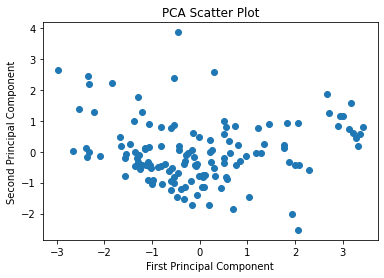

In [ ]:
# Map the data to two dimensions by using principal component analysis

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

#pca = PCA(n_components=2)
#X_r= pca.fit(X).transform(X)

pca = PCA(n_components=2)
proj = pca.fit_transform(X_arr_zscore)
plt.scatter(proj[:, 0], proj[:, 1])

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")

#plt.colorbar()

plt.show()

In [ ]:
#shows the shape of the dataset before and after PCA
print(X_arr.shape)
print(proj.shape)

(134, 4)
(134, 2)


Yes, I see some distinct clusters, but cant really say how many of such cluseters.

### Part 2: Perform clustering on the data and evaluate the results using silhouette score
 
 - Perform agglomerative hierarchical clustering (sklearn.cluster.AgglomerativeClustering) on the data, trying different linkage criteria (ward, complete, single, average). Choose n_clusters -hyperparameter based on the number of classes (i.e. different ship types in the data). Use default values for the other hyperparameters.
 - Use the z-score standardized 4-dimensional data for the clustering - not the pca-transformed data!
 - Compute and print silhouette score for each clustering using a different linkage criterion. Which linkage criterion performs the best with respect to the silhouette score?

In [ ]:
# Perform agglomerative hierarchical clustering on the data using linkage: ward

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')

pred = cluster.fit_predict(X_arr_zscore)


print(silhouette_score(X_arr_zscore, pred))





0.43011853388720317


In [ ]:
# # Perform agglomerative hierarchical clustering on the data using linkage: complete
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='complete')

pred = cluster.fit_predict(X_arr_zscore)

print(silhouette_score(X_arr_zscore, pred))


0.3924324866218544


In [ ]:
3 # Perform agglomerative hierarchical clustering on the data using linkage: single
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='single')

pred = cluster.fit_predict(X_arr_zscore)

print(silhouette_score(X_arr_zscore, pred))


0.3035356273749434


In [ ]:
# # Perform agglomerative hierarchical clustering on the data using linkage: average
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='average')

pred = cluster.fit_predict(X_arr_zscore)

print(silhouette_score(X_arr_zscore, pred))

0.3184751869502867


The linkage criterion "ward" performed best with the higest silhouette_score of 0.43

###  Part 3: Compare the clusters with the true labels

 - If you performed the preprocessing steps as instructed, the linkage criterion with the highest silhouette score should be 'ward'. If a different linkage criterion performed better, make sure all the preprocessing steps were performed correctly. In any case, use 'ward' linkage criterion from here on.
 
 - Perform agglomerative hierarchical clustering using the chosen linkage criterion and the same number of clusters as before. Visualize the clusters in a scatter plot by performing pca transformation to two dimensions and color the scatter plot based on the predictions produced by the clustering algorithm.
 
 - Visualize the data again, this time coloring the scatter plot based on the true class labels. Compare the two scatter plots: how well do the clusters found by the clustering algorithm match the true classes? Place the two scatter plots so that they can easily be compared (e.g. in subplots next to each other in the same figure).
 
 - Based on the visual comparison between the clusters and true classes, would you say that the clustering was successful?
 
 - Rand score is a measure of similarity between two partitions of a set of elements - in this case true classes and clusters found by the clustering algorithm - and it is one of the most frequently used performance metrics for clustering. It is computed by considering each pair of elements in the dataset and counting pairs of elements as follows:
 
         a: number of pairs such that the elements are in the same class and in the same cluster
         b: number of pairs such that the elements are in different classes and in different clusters
         c: number of pairs such that the elements are in the same class but in different clusters
         d: number of pairs such that the elements are in different classes but in the same cluster
     
     Given a, b, c, d, the formula for rand index is:
     
         rand_index = (a+b)/(a+b+c+d).
     
- "Adjusted rand index" is corrected for chance by using maximum and expected values of rand index.

        adj_rand_index = (rand_index - expected_rand_index) / (max_rand_index - expected_rand_index)
 
- For an objective evaluation of the clustering, compute the adjusted rand score (sklearn.metrics.adjusted_rand_score) using the true labels and the labels predicted by clustering algorithm. How do you interpret the result?
 
- If the results seem unimpressive, don't get discouraged - clustering "real life" data sets is a difficult task, and a relatively low rand index does not necessarily mean that you have made a mistake.

Text(0.5, 1.0, 'PCA Scatter Plot for cluster Distribution')

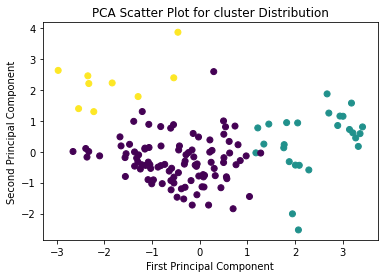

In [ ]:
# Scatter plot using the first two principal components to observe the cluster distribution

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')

pred = cluster.fit_predict(X_arr_zscore)
temp=pred

pca = PCA(n_components=2)
proj = pca.fit_transform(X_arr_zscore)

plt.scatter(proj[:, 0], proj[:, 1], c = temp)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot for cluster Distribution")




ValueError: ignored

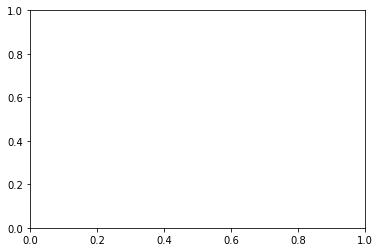

In [ ]:
# Scatter plot using the first two principal components to observe the Distribution on the true class labels
plt.scatter(proj[:, 0], proj[:, 1], c = y)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot based on the true class labels")

plt.show()

In [ ]:

# show the two graphs side by side using subplot
plt.figure(figsize=(8,4),dpi=200)

plt.subplot(1,2,1)
#sns.scatterplot(x='First Principal Component',Y='Second Principal Component', c=temp, hue= None)

plt.scatter(proj[:, 0], proj[:, 1], c = temp)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot for cluster Distribution")

plt.subplot(1,2,2)
#sns.scatterplot(x='First Principal Component',Y='Second Principal Component',c=y, hue= None)

plt.scatter(proj[:, 0], proj[:, 1], c = y)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot based on the true class labels")


In [ ]:
# compute the adjusted rand score using the true labels and the labels predicted by clustering algorithm.

from sklearn.metrics.cluster import adjusted_rand_score

### Part 4: Plot the dendrogram

 - As a last step, plot a dendrogram of the clustering to visualize the merging process.
 - For this you will need a linkage matrix - while you can extract one from the AgglomerativeClustering model, it is much easier to use the scipy implementation (scipy.cluster.hierarchy.linkage).
 - Compute the linkage matrix using Ward's method, and plot the dendrogram (using scipy.cluster.hierarchy.dendrogram). Truncate the dendrogram so that three levels of the dendrogram tree are visible for better readability.
 - Consult the course material. How do you interpret the dendrogram?

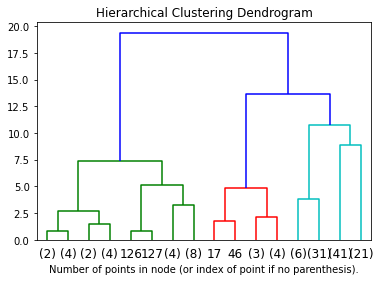

In [ ]:
#  ploting the dendrogram

from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X_arr_zscore)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

The Dendrogram is a tree showing the order and distances of merges during the hierarchical clustering.

The algorithm starts by finding the two points that are closest to each other on the basis of Euclidean distance. From the graph it can be seen that the dendograms have been created joining points 2 with 4, and 17 with 46, 6 with 31. The vertical height of the dendogram shows the Euclidean distances between points. From Graph2, it can be seen that Euclidean distance between points 6 and 31 is greater than the distance between point 2 and 4.

### Part 5: Optional bonus task 

 - In this exercise you have used agglomerative hierarchical clustering to find patterns in the data. K-means clustering is another important method of unsupervised learning with many applications.
 - Write your own simple implementation of naive k-means clustering algorithm and use it to find patterns in the data as in part 3. Plot the result and print the rand score as in part 3.
 - As this is a relatively difficult task, a perfect implementation is not expected nor required for the bonus point.
 - Remember to comment the code extensively! (Bonus point will not be awarded for uncommented solution)

In [ ]:
# write code here, feel free to add more code cells as needed.

**Refences**

1. https://www.kaggle.com/ankandash/pca-k-means-clustering-hierarchical-clustering.

2. https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2.

3. https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

4. https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

5. https://aggieanil.wordpress.com/2017/08/23/machine-learning-ii-unsupervised-machine-learning-clustering-and-principal-component-analysis/

6. https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-download-auto-examples-cluster-plot-agglomerative-dendrogram-py

7. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

8. https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html

9. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html?highlight=silhouette_score#sklearn.metrics.silhouette_score

10. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html
